Let's go to exploring stock price prediction using three methods:


In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# add some magic
%matplotlib inline

# Download the data

Download Delphi Technologies's stock data (previously downloaded from [https://finance.yahoo.com/quote/DLPH?p=DLPH] and saved in our server) and use Pandas to read it:

In [2]:
!wget -O delphy.csv https://www.fenix-es.com/downloads/ml/DLPH.csv
data = pd.read_csv('delphy.csv')
data.shape

--2019-09-12 14:04:21--  https://www.fenix-es.com/downloads/ml/DLPH.csv
Resolving www.fenix-es.com (www.fenix-es.com)... 148.251.140.8
Connecting to www.fenix-es.com (www.fenix-es.com)|148.251.140.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 135214 (132K) [application/octet-stream]
Saving to: ‘delphy.csv’

delphy.csv          100%[===================>] 132.04K  --.-KB/s    in 0.004s  

2019-09-12 14:04:21 (28.8 MB/s) - ‘delphy.csv’ saved [135214/135214]



(1963, 7)

In [3]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1.963000e+03
mean,55.711526,56.329578,55.055261,55.702934,52.854917,1.999403e+06
std,23.088287,23.214079,22.944363,23.090539,22.152783,2.165098e+06
min,12.490000,13.125000,12.260000,12.520000,12.520000,3.170000e+04
25%,33.145000,33.729999,32.819999,33.240000,30.567955,1.171150e+06
50%,59.689999,60.209999,58.849998,59.439999,55.334553,1.695700e+06
75%,71.965000,72.820000,71.060001,71.820000,68.253872,2.366850e+06
max,103.739998,104.089996,102.800003,103.449997,100.869919,7.324240e+07


In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-11-17,21.250000,21.920000,21.250000,21.330000,19.405193,17557500
1,2011-11-18,21.350000,21.530001,20.750000,21.000000,19.104969,2718500
2,2011-11-21,21.000000,21.230000,20.020000,20.299999,18.468138,2366400
3,2011-11-22,20.299999,20.709999,19.650000,19.900000,18.104231,2988700
4,2011-11-23,19.700001,19.750000,19.219999,19.629999,17.858593,1061400


Let's look at the data in a graph:

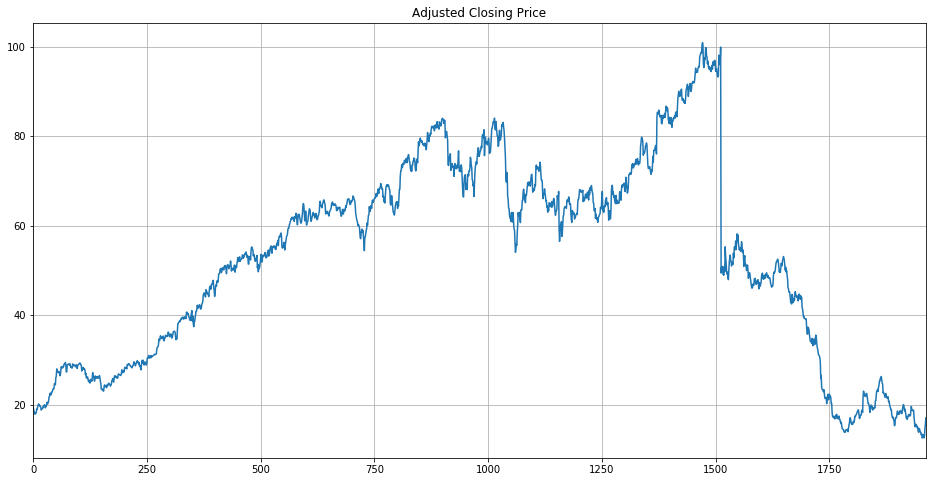

In [5]:
data['Adj Close'].plot(label='DLPH', figsize=(16,8), title='Adjusted Closing Price', grid=True)

# Prepare the data

In [6]:
data.fillna(value=-99999, inplace=True)
data.set_index('Date', inplace=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-11-17,21.250000,21.920000,21.250000,21.330000,19.405193,17557500
2011-11-18,21.350000,21.530001,20.750000,21.000000,19.104969,2718500
2011-11-21,21.000000,21.230000,20.020000,20.299999,18.468138,2366400
2011-11-22,20.299999,20.709999,19.650000,19.900000,18.104231,2988700
2011-11-23,19.700001,19.750000,19.219999,19.629999,17.858593,1061400


In [7]:
window_size=64 # roughtly three months
num_samples=len(data)-window_size
# Get indices to prepare sample data
indices=np.arange(num_samples).astype(np.int)[:,None]+np.arange(window_size+1).astype(np.int)
# Extract sample data
samples = data['Adj Close'].values[indices] # Create the 2D matrix of training samples
x = samples[:,:-1] # Each row represents 64 days in the past
y = samples[:,-1] # Each output value represents the 65th day

In [8]:
split_fraction=0.9
ind_split=int(split_fraction*num_samples)
x_train = x[:ind_split]
y_train = y[:ind_split]
x_test = x[ind_split:]
y_test = y[ind_split:]
y_test.shape

(190,)

# Processing

In [9]:
#Helper functions
def get_metrics (model_data, model_pred):
  # standard performance metrics
  print('Mean Absolute Error:', metrics.mean_absolute_error(model_data, model_pred).round(4))  
  print('Mean Squared Error:', metrics.mean_squared_error(model_data, model_pred).round(4))  
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(model_data, model_pred)).round(4))

    
def get_plot (model_data, model_pred):
  plt.scatter(model_pred, model_data, color="gray")
  plt.plot(model_data, model_data, color='red', linewidth=2)


## Linear Regression

In [10]:
model_lr=LinearRegression()
# train model
model_lr.fit(x_train, y_train)
# generate predictions
y_pred_lr=model_lr.predict(x_test)
# evaluate predictions
get_metrics(y_test, y_pred_lr)

Mean Absolute Error: 0.5059
Mean Squared Error: 0.4576
Root Mean Squared Error: 0.6765


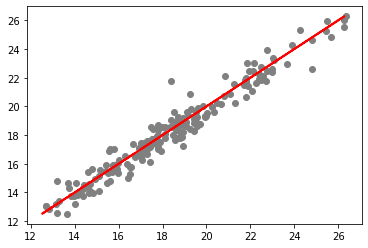

In [11]:
# plot predictions
get_plot(y_test, y_pred_lr)

## Ridge Regression

In [12]:
model_ridge = Ridge(alpha=.5)
model_ridge.fit(x_train, y_train)
# generate predictions
y_pred_ridge=model_ridge.predict(x_test)
# evaluate predictions
get_metrics(y_test, y_pred_ridge)

Mean Absolute Error: 0.5059
Mean Squared Error: 0.4576
Root Mean Squared Error: 0.6765


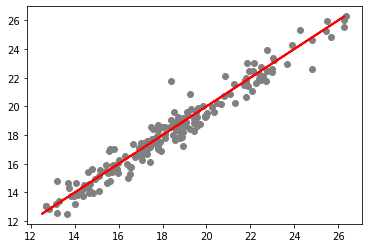

In [13]:
# plot predictions
get_plot(y_test, y_pred_ridge)

## Lasso Regression

In [14]:
model_lasso = Lasso(alpha=.1)
model_lasso.fit(x_train, y_train)
# generate predictions
y_pred_lasso=model_lasso.predict(x_test)
# evaluate predictions
get_metrics(y_test, y_pred_lasso)

Mean Absolute Error: 0.4884
Mean Squared Error: 0.4389
Root Mean Squared Error: 0.6625


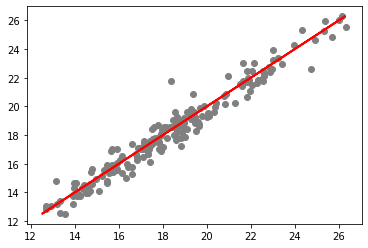

In [15]:
# plot predictions
get_plot(y_test, y_pred_lasso)

## Bayesian Ridge Regression

In [16]:
model_br = BayesianRidge()
# train model
model_br.fit(x_train, y_train)
# generate predictions
y_pred_br = model_br.predict(x_test)
# evaluate predictions
get_metrics(y_test, y_pred_br)

Mean Absolute Error: 0.5077
Mean Squared Error: 0.4629
Root Mean Squared Error: 0.6804


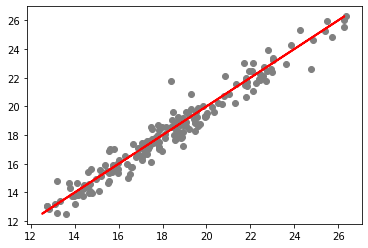

In [17]:
# plot predictions
get_plot(y_test, y_pred_br)